# Fit Single Region
In this example, we are going to fit a single region of the science verification Abell 426 data cube (found at: [https://www.cfht.hawaii.edu/Instruments/Sitelle/SITELLE_sv.php](https://www.cfht.hawaii.edu/Instruments/Sitelle/SITELLE_sv.php)).

We will read in the data as usual using a `LUCI` cube object. We then will extract a background region and plot it. We will then extract a spectrum from a square
region around 1357<x<1367 and 608<y<618. These values were chosen to correspond with the brighest region of the horseshoe. Finally, we use the `LuciFit` Fit object to fit the region. 

In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import LUCI.LuciFit as lfit
from astropy.io import fits
import numpy as np
import keras

In [3]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/M33/SN1'  # Path to data cube
cube_name = 'SN1_Field7'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 1000
ML_bool = True

### Create Luci object, extract background, and extract region to fit.

In [4]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution, ML_bool)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [00:46<00:00,  5.20s/it]


In [5]:
cube.create_deep_image()

100%|██████████| 2064/2064 [00:13<00:00, 150.93it/s]


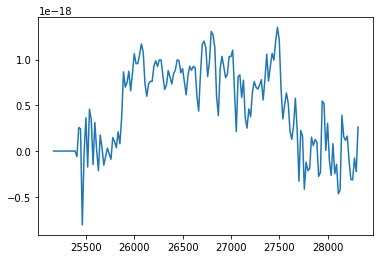

In [6]:
# Extract and visualize background
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.plot(bkg_axis, bkg_sky)

### Fit and visualize

We are now going to fit a region that we defined in ds9 separately.

In [9]:
velocity_map, broadening_map, flux_map, chi2_map, mask = cube.fit_region(['OII3726', 'OII3729'], 'gaussian', [1,1], [1,1],
            region=cube_dir+'/reg1.reg', bkg=bkg_sky)

100%|██████████| 2064/2064 [09:38<00:00,  3.57it/s]


28329


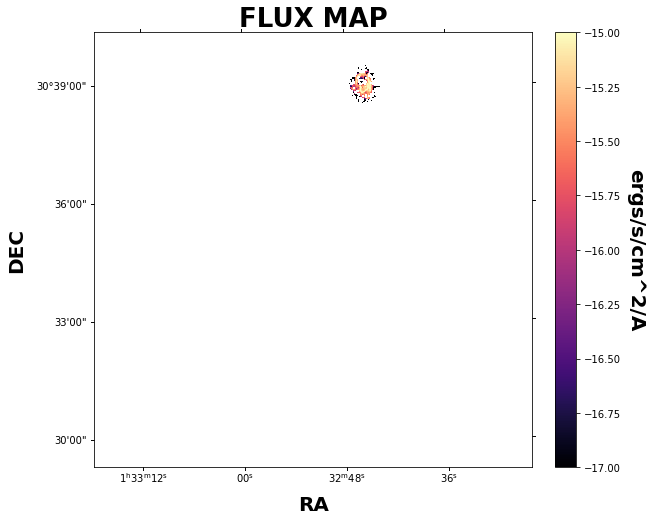

In [12]:
lplt.plot_map(np.log10(flux_map[:,:,0]), 'flux', cube_dir, cube.header, clims=[-17, -15])